In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [32]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
df.describe(include='all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
# Replace categorical data with numerical representation for gender
df['Genre_binary'] = df['Genre'].map({'Male':1, 'Female':0 })
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_binary
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


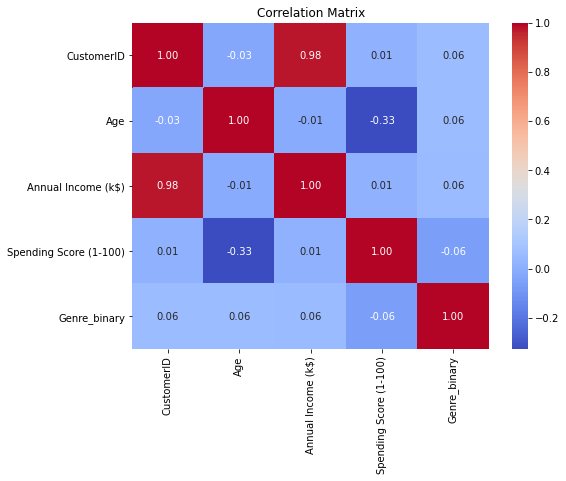

In [36]:
# Correlation Analysis
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [37]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Genre_binary'],
      dtype='object')

In [39]:
scale_df = df.copy()
scale_df.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Genre_binary  
0               1  
1               1

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

feat = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scale_df[feat] = scaler.fit_transform(scale_df[feat])
scale_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_binary
0,1,Male,-1.424569,-1.738999,-0.434801,1
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,0
3,4,Female,-1.137502,-1.700830,1.040418,0
4,5,Female,-0.563369,-1.662660,-0.395980,0


In [42]:
# outlier detection
from scipy import stats
# Calculate z-scores
z_scores = stats.zscore(scale_df[feat])

# Remove rows with Z-scores above a certain threshold (e.g., |z| > 3)
scale_df = scale_df[(z_scores < 3).all(axis=1)]

In [43]:
scale_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_binary
0,1,Male,-1.424569,-1.738999,-0.434801,1
1,2,Male,-1.281035,-1.738999,1.195704,1
2,3,Female,-1.352802,-1.700830,-1.715913,0
3,4,Female,-1.137502,-1.700830,1.040418,0
4,5,Female,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,0
196,197,Female,0.441365,2.497807,-0.861839,0
197,198,Male,-0.491602,2.497807,0.923953,1
198,199,Male,-0.491602,2.917671,-1.250054,1


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


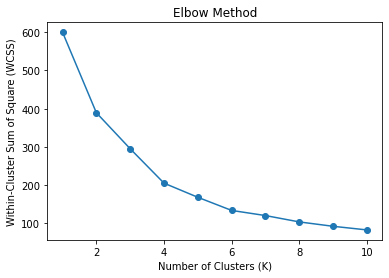

In [44]:
# Identofying K using the elbow method
from sklearn.cluster import KMeans
# List to store the WCSS values
wcss = []

# Calculate WCSS for different values of K (1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scale_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.show()


In [45]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette score for different values of K
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scale_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    score = silhouette_score(scale_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
    print(f"For n_clusters = {i}, silhouette score is {score:.4f}")


For n_clusters = 2, silhouette score is 0.3355
For n_clusters = 3, silhouette score is 0.3578
For n_clusters = 4, silhouette score is 0.4040
For n_clusters = 5, silhouette score is 0.4166
For n_clusters = 6, silhouette score is 0.4284
For n_clusters = 7, silhouette score is 0.4112
For n_clusters = 8, silhouette score is 0.4084
For n_clusters = 9, silhouette score is 0.4201
For n_clusters = 10, silhouette score is 0.4226


In [46]:
# Define the K-Means model with the optimal number of clusters
kmeansModel = KMeans(n_clusters=6, random_state=42)

# Fit the model to your dataset and predict the cluster labels
scale_df['Cluster'] = kmeansModel.fit_predict(scale_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Display the dataset with the assigned cluster labels
scale_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_binary,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,1,0
1,2,Male,-1.281035,-1.738999,1.195704,1,0
2,3,Female,-1.352802,-1.700830,-1.715913,0,5
3,4,Female,-1.137502,-1.700830,1.040418,0,0
4,5,Female,-0.563369,-1.662660,-0.395980,0,5


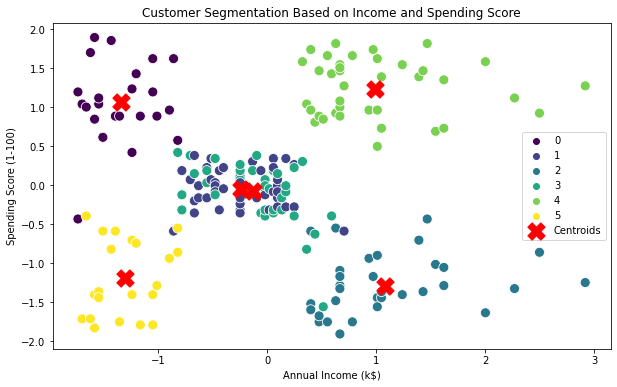

In [17]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=scale_df, palette='viridis', s=100)

# Add cluster centers to the plot
plt.scatter(kmeansModel.cluster_centers_[:, 1], kmeansModel.cluster_centers_[:, 2], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.legend()
plt.show()

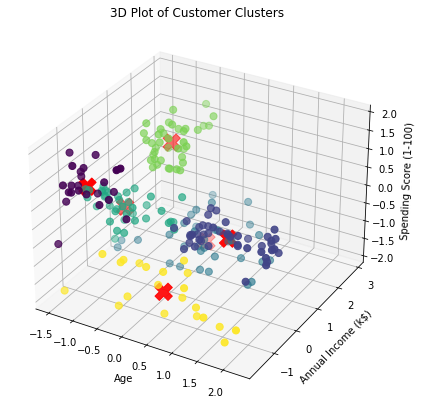

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Initialize a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of clusters
ax.scatter(scale_df['Age'], scale_df['Annual Income (k$)'], scale_df['Spending Score (1-100)'], c=scale_df['Cluster'], cmap='viridis', s=50)

# Plot the cluster centroids
ax.scatter(kmeansModel.cluster_centers_[:, 0], kmeansModel.cluster_centers_[:, 1], kmeansModel.cluster_centers_[:, 2], s=300, c='red', label='Centroids', marker='X')

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Plot of Customer Clusters')
plt.show()

In [48]:
# Print the coordinates of the cluster centroids
print("Cluster Centroids:\n", kmeansModel.cluster_centers_)

Cluster Centroids:
 [[-0.99396865 -1.34734766  1.06404834]
 [ 1.25472096 -0.24021294 -0.04399777]
 [ 0.22171558  1.08322527 -1.29005223]
 [-0.86515664 -0.13196835 -0.08043031]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.47895722 -1.30822992 -1.19644353]]


# EVALUATION

In [49]:
# Save the clustered dataset to a CSV file
scale_df.to_csv('clustered_scaled_customers.csv', index=False)

In [52]:
df['Cluster'] = cluster_labels
df.head

<bound method NDFrame.head of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Genre_binary  Cluster  
0               1        0  

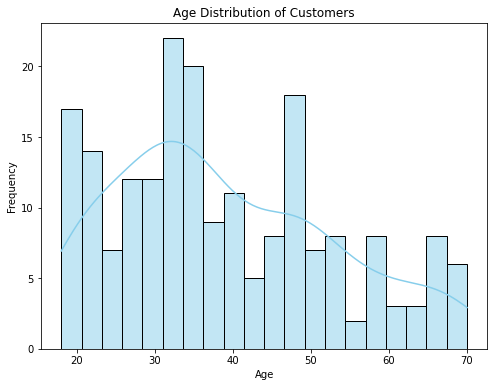

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the age column is 'Age'
plt.figure(figsize=(8, 6))

# Create a histogram with a KDE plot
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


In [54]:
group_Data = df.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'median', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'median', 'min', 'max']
    }).reset_index()
group_Data

Cluster        Age                Annual Income (k$)                  \
                mean median min max               mean median min  max   
0       0  25.000000     23  18  35          25.260870     24  15   39   
1       1  56.333333     54  43  70          54.266667     54  38   79   
2       2  41.939394     43  19  59          88.939394     86  71  137   
3       3  26.794872     26  18  40          57.102564     60  39   76   
4       4  32.692308     32  27  40          86.538462     79  69  137   
5       5  45.523810     46  20  67          26.285714     25  16   39   

  Spending Score (1-100)                 
                    mean median min max  
0              77.608696     77  39  99  
1              49.066667     49  35  60  
2              16.969697     16   1  39  
3              48.128205     50  10  61  
4              82.128205     83  63  97  
5              19.380952     15   3  40

# INTERPRETATION

Cluster 0:

Average Age: 25
Annual Income: 25.2 (k$)
Spending Score: 77.6
Interpretation: This cluster represents young customers with low income but high spending scores. They may be students or young professionals who are enthusiastic spenders, likely spending a large portion of their income on discretionary or lifestyle purchases. They are a key target for marketing campaigns focused on high engagement.

Cluster 1:

Average Age: 56
Annual Income: 52.3 (k$)
Spending Score: 49.1
Interpretation: This cluster represents older customers with a moderate income and a medium spending score. They likely have more financial stability but are cautious with their spending. They might spend on necessary or higher-value products but with careful consideration, possibly favoring savings over impulse purchases.

Cluster 2:

Average Age: 42
Annual Income: 89 (k$)
Spending Score: 17
Interpretation: This cluster represents middle-aged customers with a high income but a low spending score. They are likely wealthier individuals who are conservative in their spending habits. They could be saving for long-term goals or investments and are less likely to engage in frequent shopping, especially for non-essential items.

Cluster 3:

Average Age: 26.8
Annual Income: 57 (k$)
Spending Score: 48
Interpretation: This cluster represents young adults with a moderate income and average spending behavior. They are likely to be young professionals who have stable jobs and spend moderately. They may balance between savings and spending, purchasing both necessary and occasional luxury items.

Cluster 4:

Average Age: 33
Annual Income: 87 (k$)
Spending Score: 82
Interpretation: This cluster represents young to middle-aged customers with high income and a high spending score. These customers have strong purchasing power and are willing to spend significantly, likely on premium or luxury goods. They represent an attractive target for high-end brands or products.

Cluster 5:

Average Age: 46
Annual Income: 26 (k$)
Spending Score: 19
Interpretation: This cluster represents middle-aged customers with a low income and a low spending score. They are likely to be very budget-conscious, potentially due to limited income or financial constraints. They are not frequent or enthusiastic shoppers and may only purchase essential items.

HIGH SPENDING CLUSTERS: CLUSTER 0 and 4 show high spending scores, but they differ significantly in age and income. Cluster 0 includes younger customers with low income, while Cluster 4 includes higher-income individuals. Different marketing strategies would be needed for each segment.

Moderate-Spending Clusters: Clusters 1 and 3 have moderate spending scores and income levels. These groups could be targeted with offers that balance affordability and value.

Low-Spending Clusters: Clusters 2 and 5 are low-spending groups. Cluster 2 includes wealthier individuals who choose to spend conservatively, while Cluster 5 includes lower-income individuals who may lack discretionary spending power.

# Suggested Marketing Actions

Target High-Spending Segments: Focus on marketing efforts toward Clusters 0 and 4, tailoring products or services to meet their preferences (youth-oriented deals for Cluster 0, premium products for Cluster 4).

Engage Moderate-Spending Segments: Develop loyalty programs, discounts, or value-added offers to attract Clusters 1 and 3, encouraging increased engagement or spending.

Understand Low-Spending Segments: Analyze what drives the conservative spending of Clusters 2 and 5. Cluster 2 might need specialized, high-value offerings, while Cluster 5 could be targeted with affordable, essential products.